In [45]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
os.environ["MKL_NUM_THREADS"] = '1'

## 1. Import Necessary Libraries

In [48]:
# Now import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


## 2. Load and Prepare the Dataset:

In [51]:
# Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display the first few rows of the dataset
print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [68]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and add the cluster labels to the DataFrame
df['cluster'] = kmeans.fit_predict(X_scaled)


## 3. Apply K-Means Clustering:

In [73]:
# Initialize the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and add the cluster labels to the DataFrame
df['cluster'] = kmeans.fit_predict(X_scaled)


## 4. Plot 1: t-SNE Visualization of Clusters

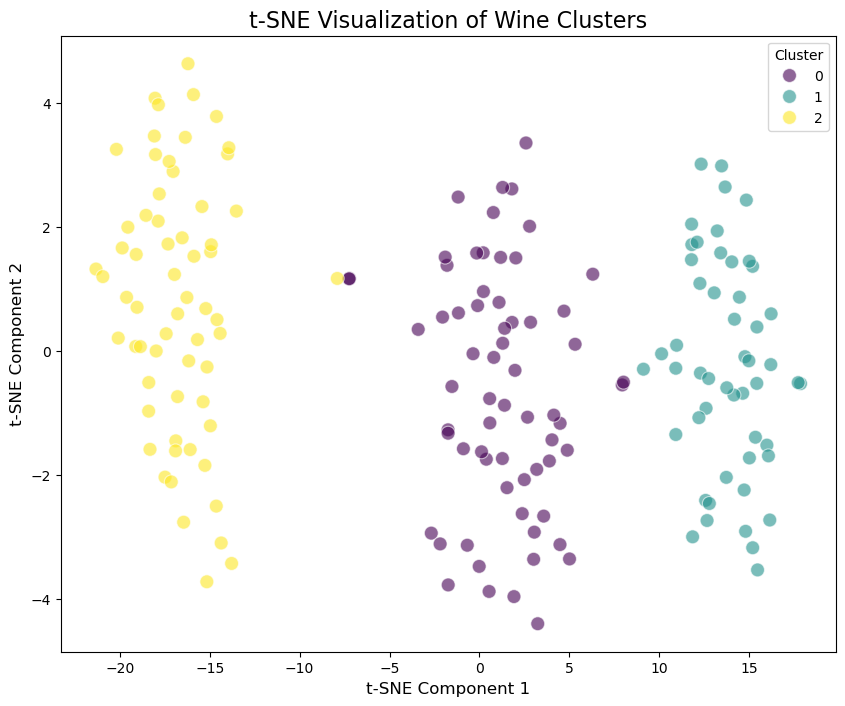

In [76]:
# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(X_tsne, columns=['x', 'y'])
df_tsne['cluster'] = df['cluster']

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='cluster', data=df_tsne, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('t-SNE Visualization of Wine Clusters', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.show()


## 5. Plot 2: PCA Biplot

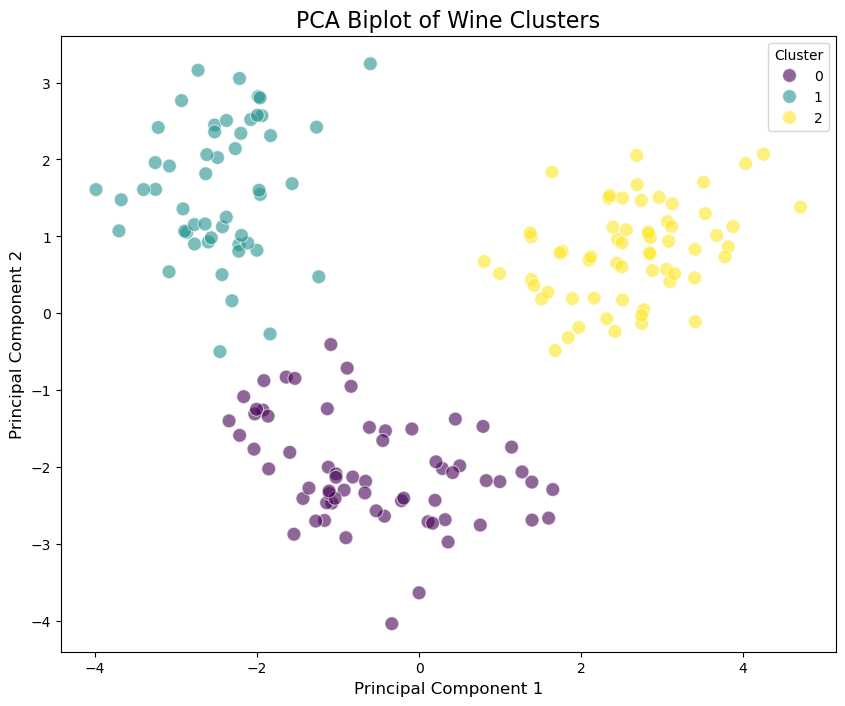

In [79]:
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create a DataFrame for visualization
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['cluster'] = df['cluster']
    
    # Plotting
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis', s=100, alpha=0.6, edgecolor='w')
    plt.title('PCA Biplot of Wine Clusters', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(title='Cluster', fontsize=10)
    plt.show()


 ## 6. Evaluation and Interpretation of Clustering Results

### Inertia (WCSS):

In [83]:
print(f'Inertia (WCSS): {kmeans.inertia_}')

Inertia (WCSS): 1277.928488844643


### Silhouette Score:

In [86]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.332193624443781


### Davies-Bouldin Index

In [89]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin score
db_score = davies_bouldin_score(X_scaled, df['cluster'])
print(f'Davies-Bouldin Score: {db_score}')


Davies-Bouldin Score: 1.2383362376810698
